In [1]:
## import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/gurgaon_property_data_after_Missing_Value_Imputation (1)')
df.sample(5)

,Property_type,society,sector,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
1492,flat,ss the leaf,sector 85,1.25,7179.0,1741.189581,2.0,2.0,2,10.0,Relatively New Property,1730.0,0,0,0,0,0,1,49.0
758,flat,unitech fresco,sector 50,1.14,8532.0,1336.146273,2.0,2.0,3,19.0,Moderately Old,1330.0,0,0,0,0,1,1,93.0
709,flat,satya the hermitage,sector 103,1.00,6655.0,1502.629602,3.0,4.0,2,2.0,Relatively New Property,1771.0,0,1,0,1,0,1,165.0
3115,house,ansal celebrity homes,sector 2,5.20,10000.0,5200.000000,4.0,5.0,3,1.0,Moderately Old,5200.0,0,0,0,0,0,1,0.0
3308,house,central park flower valley cerise floors,sector 33,1.35,11157.0,1210.000000,2.0,2.0,3,4.0,New Property,1210.0,1,0,0,0,0,1,29.0


In [3]:
## As there is build_up_area then no need of Area column
df=df.drop('Area',axis=1)

In [4]:
## As price_per_sqft is highly correlated to price which is our output column, so we havt to remove it because not good for price prediction model and recommander system also
## Also society name
df=df.drop(columns=['Price_per_sqrt','society'])

In [5]:
df.shape

(3550, 16)

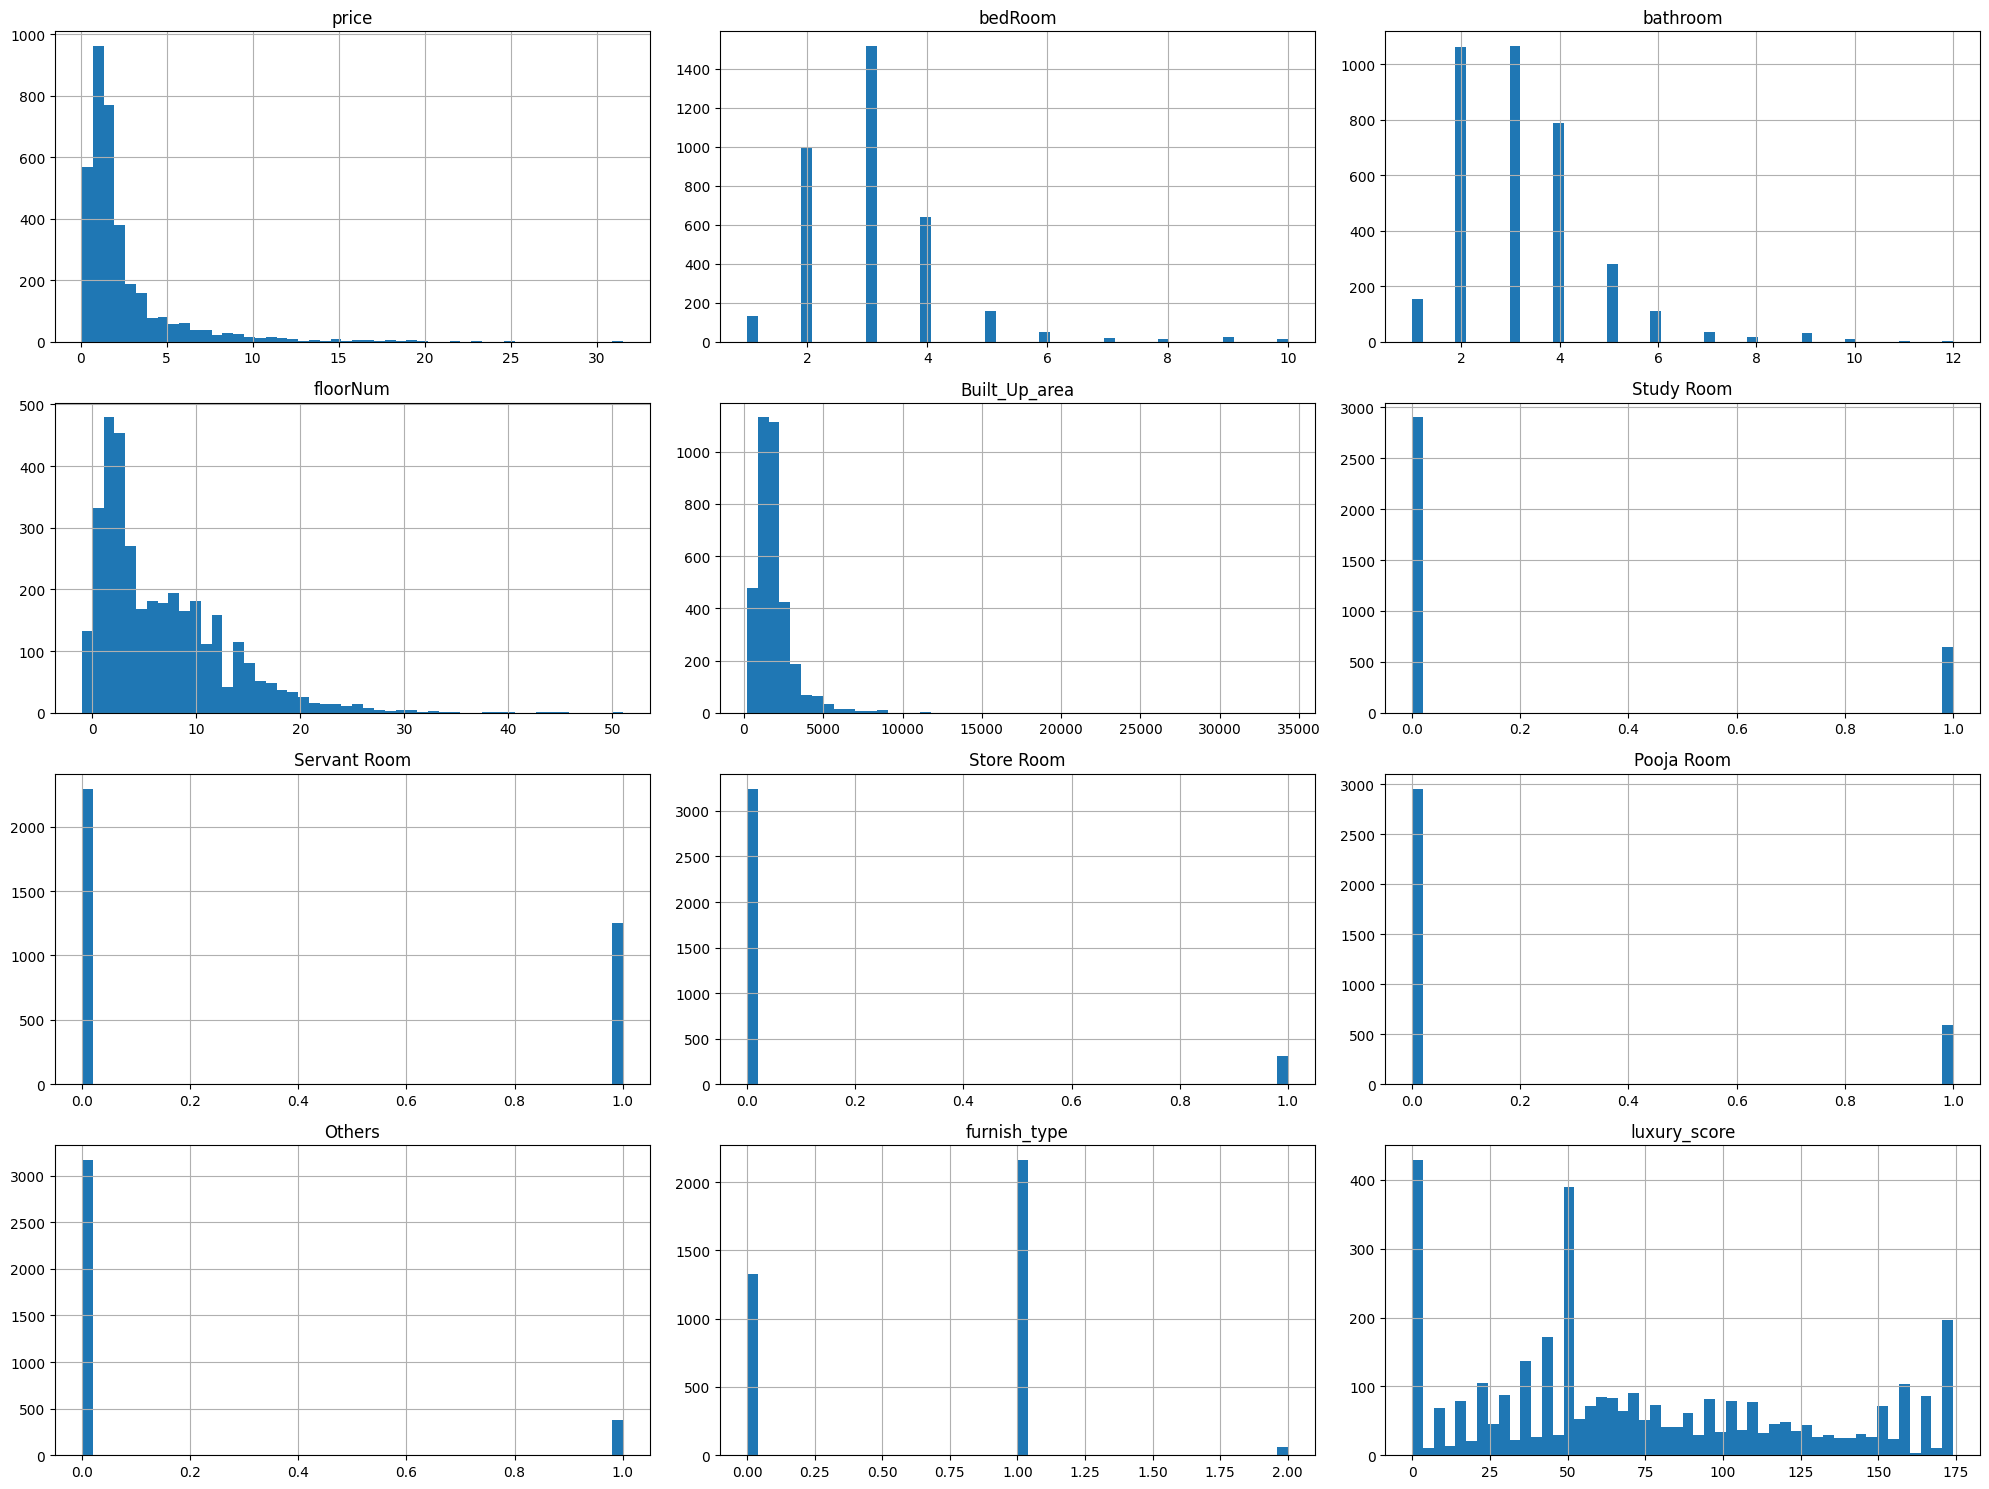

In [6]:
df.hist(bins=50,figsize=(20,15))
plt.tight_layout()
plt.show()

#`luxury_score`

In [7]:
px.box(df['luxury_score'])

In [8]:
df[(df['price']>10) & (df['luxury_score']<100)].shape

(68, 16)

In [9]:
px.scatter(df,x='luxury_score',y='price')

In [10]:
df['luxury_score'].mean()

72.27126760563381

In [11]:
df[df['luxury_score']>150]['price'].mean()

2.3825894736842104

In [12]:
df[df['luxury_score']==0]['price'].mean()

2.2345920745920744

In [13]:
df[df['luxury_score']==0].shape

(429, 16)

In [14]:
def categorize_luxury(score):
  if 0<= score<50:
    return 'Low'
  elif 50 <= score < 150:
    return 'moderate'
  elif 150 <= score < 175:
    return 'High'
  else:
    return None ## for outside the bin value

In [15]:
df['luxury_category']=df['luxury_score'].apply(categorize_luxury)

In [16]:
df['luxury_category'].value_counts()

,count
luxury_category,
Low,1590
moderate,1467
High,493


##`Floor Num`

In [17]:
px.box(df['floorNum'])

In [18]:
px.scatter(df,x='floorNum',y='price')

In [19]:
df[df['floorNum']==-1]

,Property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score,luxury_category
115,flat,sector 63a,0.42,3.0,2.0,2,-1.0,Relatively New Property,638.0,0,0,0,0,0,0,49.0,Low
189,flat,sector 4,0.39,2.0,2.0,3,-1.0,Relatively New Property,950.0,0,0,0,0,0,1,51.0,moderate
2010,flat,sector 67a,1.30,2.0,2.0,3+,-1.0,New Property,1296.0,0,0,0,0,0,1,101.0,moderate


In [20]:
df.loc[[115,189,2010],'floorNum']=0

In [21]:
df['floorNum'].min()

0.0

In [22]:
def categorize_floor(floor):
  if 0<= floor <=2:
    return 'Low'
  elif 3 <= floor <= 10:
    return 'Medium'
  elif 11 <= floor <=51:
    return 'High rise'
  else:
    return None ## for outside the bin value

In [23]:
df['floor_category']=df['floorNum'].apply(categorize_floor)

In [24]:
df['floor_category'].value_counts()

,count
floor_category,
Medium,1792
Low,944
High rise,814


In [25]:
df=df.drop(columns=['floorNum','luxury_score'])

In [26]:
df.head()

,Property_type,sector,price,bedRoom,bathroom,balcony,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_category,floor_category
0,flat,sector 7,0.45,2.0,2.0,2,Relatively New Property,1013.0,0,0,0,0,0,1,Low,Medium
1,flat,sector 3,0.50,2.0,2.0,2,Old Property,731.0,0,0,0,0,0,1,Low,Low
2,flat,sohna road,0.40,2.0,2.0,1,New Property,669.0,0,0,0,0,0,0,Low,High rise
3,flat,sector 61,1.47,2.0,2.0,1,New Property,1350.0,1,0,0,0,0,0,moderate,Low
4,flat,sector 92,0.70,2.0,2.0,3+,Under Construction,1210.0,1,0,0,0,0,0,Low,Medium


In [27]:
df.select_dtypes('O').columns

Index(['Property_type', 'sector', 'balcony', 'agePossession',
       'luxury_category', 'floor_category'],
      dtype='object')

In [28]:
from sklearn.preprocessing import OrdinalEncoder
data_label_encoded=df.copy()
categorical_columns=df.select_dtypes('O').columns
for col in categorical_columns:
  encoder=OrdinalEncoder()
  data_label_encoded[col]=encoder.fit_transform(data_label_encoded[[col]])
  print(encoder.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [53]:
## spliting the data into train and test
X=data_label_encoded.drop('price',axis=1)
y=data_label_encoded['price']

In [30]:
X.sample(10)

,Property_type,sector,bedRoom,bathroom,balcony,agePossession,Built_Up_area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_category,floor_category
2369,0.0,69.0,2.0,2.0,2.0,4.0,1034.0,1,0,0,0,0,1,1.0,2.0
1532,0.0,97.0,2.0,2.0,2.0,3.0,1422.0,0,0,1,0,0,1,2.0,1.0
3033,1.0,18.0,9.0,9.0,3.0,2.0,9000.0,0,0,0,0,0,0,2.0,2.0
2074,0.0,89.0,4.0,5.0,3.0,1.0,2675.0,0,1,0,0,0,1,2.0,2.0
1783,0.0,44.0,3.0,3.0,2.0,3.0,1688.0,0,0,0,0,0,1,2.0,0.0
183,0.0,105.0,2.0,2.0,3.0,4.0,1187.0,0,0,0,0,1,0,1.0,0.0
1210,0.0,43.0,3.0,3.0,4.0,3.0,1586.0,0,0,0,0,1,0,1.0,1.0
1529,0.0,97.0,4.0,5.0,0.0,3.0,2438.0,0,1,0,0,0,1,0.0,2.0
44,0.0,103.0,4.0,4.0,3.0,3.0,3068.0,0,1,0,1,0,1,2.0,2.0
2595,0.0,10.0,3.0,4.0,3.0,3.0,2850.0,0,0,0,0,0,0,1.0,0.0


In [31]:
y.sample(10)

,price
154,2.20
388,3.20
2823,0.90
2922,3.10
481,1.80
2098,6.75
1544,1.80
1798,1.85
118,1.25
1336,5.20


#`we are using all 8 technique of feature selection for real estate data feature selection `

##`1.> Correlation Analysis`

<Axes: >

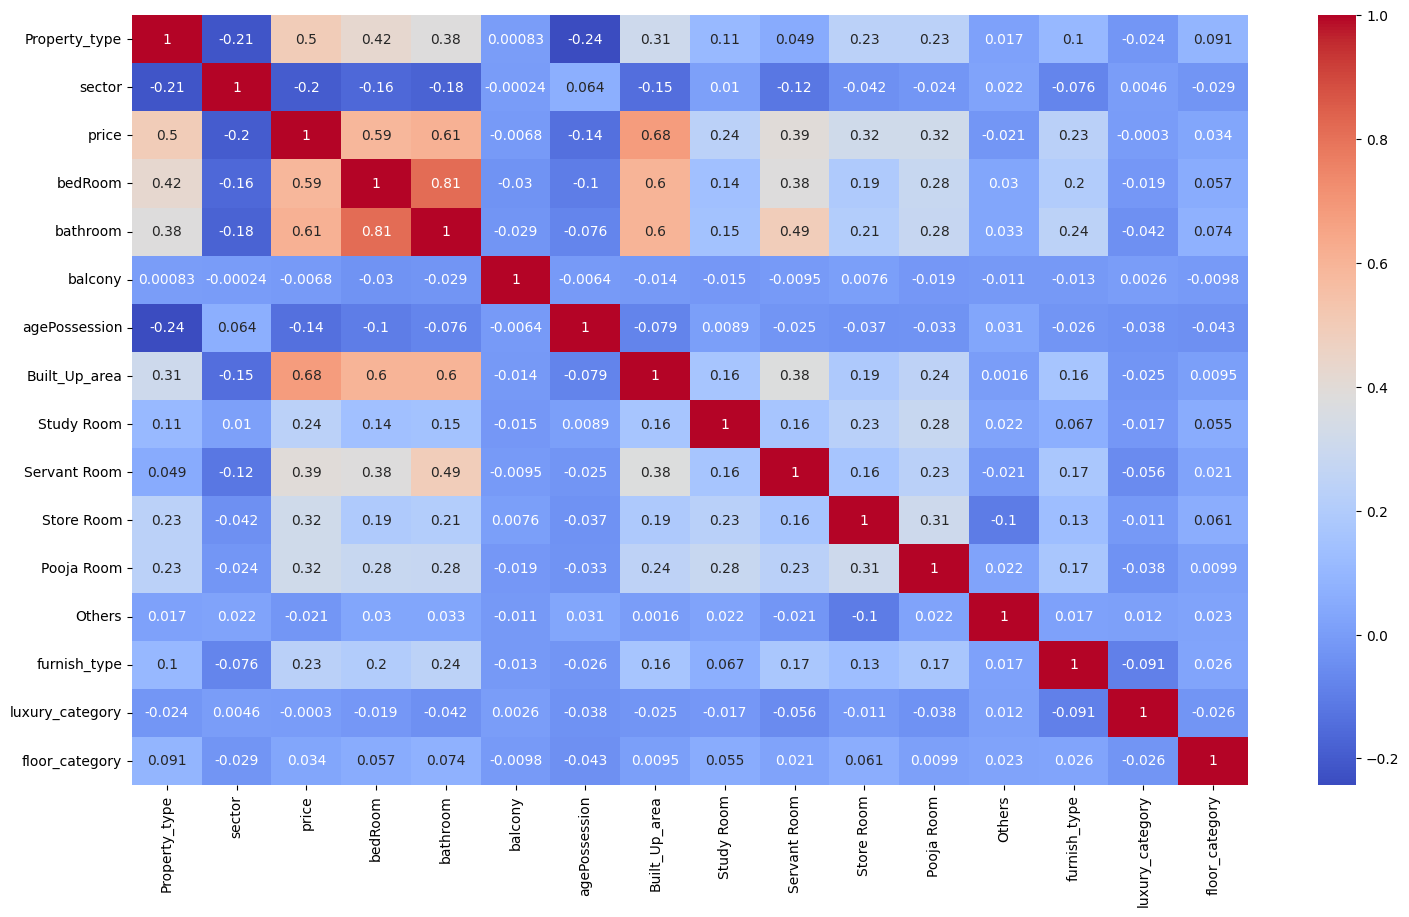

In [32]:
plt.figure(figsize=(18,10))
sns.heatmap(data_label_encoded.corr(),annot=True,cmap='coolwarm')

In [33]:
F1_df=data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'columns','price':'corr_coef'}).sort_values(by='corr_coef',ascending=False)
F1_df

,columns,corr_coef
1,price,1.000000
6,Built_Up_area,0.679711
3,bathroom,0.609772
2,bedRoom,0.588689
8,Servant Room,0.394124
10,Pooja Room,0.319275
9,Store Room,0.315842
7,Study Room,0.236175
12,furnish_type,0.228534
14,floor_category,0.033664


##`2.>- Embedded feature selection through random forest feature importance`

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X,y)
## extract feature importance of each column
F2_df=pd.DataFrame({'columns':X.columns,'feature_imp_rf':rf.feature_importances_}).sort_values(by='feature_imp_rf',ascending=False)
F2_df

,columns,feature_imp_rf
6,Built_Up_area,0.634823
1,sector,0.113234
0,Property_type,0.092798
2,bedRoom,0.030798
8,Servant Room,0.030719
3,bathroom,0.022030
5,agePossession,0.013366
4,balcony,0.012156
13,luxury_category,0.010885
12,furnish_type,0.009768


## `3.> -  Embedded feature selection through gradient boosting feature importance`

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X,y)
## extract feature importance of each column
F3_df=pd.DataFrame({'columns':X.columns,'feature_imp_gd':gbr.feature_importances_}).sort_values(by='feature_imp_gd',ascending=False)
F3_df

,columns,feature_imp_gd
6,Built_Up_area,0.655168
1,sector,0.110201
0,Property_type,0.089390
2,bedRoom,0.042680
3,bathroom,0.036081
8,Servant Room,0.033289
9,Store Room,0.015527
13,luxury_category,0.005368
12,furnish_type,0.005049
5,agePossession,0.004365


##`4.> permutation_importance`

In [36]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
## split the model into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
## baseline model
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)
## calc. permutation_importance
permutation_importance_=permutation_importance(rfr,X_test,y_test,n_repeats=30,random_state=42)
## extract feature importance of each column
F4_df=pd.DataFrame({'columns':X.columns,'feature_imp_permutation':permutation_importance_.importances_mean}).sort_values(by='feature_imp_permutation',ascending=False)
F4_df

,columns,feature_imp_permutation
6,Built_Up_area,0.668560
0,Property_type,0.173570
1,sector,0.139699
8,Servant Room,0.028610
2,bedRoom,0.014355
13,luxury_category,0.004530
3,bathroom,0.004174
9,Store Room,0.003255
14,floor_category,0.003015
5,agePossession,0.002171


##`5.> lasso feature imp.`


In [37]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
## baseline model
lasso=Lasso(alpha=0.01,random_state=42)
lasso.fit(X_scaled,y)
F5_df=pd.DataFrame({'columns':X.columns,'feature_imp_lasso':lasso.coef_}).sort_values(by='feature_imp_lasso',ascending=False)
F5_df

,columns,feature_imp_lasso
6,Built_Up_area,1.115374
0,Property_type,0.656715
3,bathroom,0.362098
8,Servant Room,0.265429
9,Store Room,0.249418
7,Study Room,0.175457
12,furnish_type,0.145545
2,bedRoom,0.092025
10,Pooja Room,0.086248
13,luxury_category,0.085076


#`6.> Recursive forward elimination`

In [38]:
from sklearn.feature_selection import RFE
## baseline model
rfr=RandomForestRegressor()

## apply rfe on our data
rfe=RFE(rfr,n_features_to_select=X.shape[1],step=1)
selector_label=rfe.fit(X,y)
## get the selected label based on rfe
selected_feature=X.columns[selector_label.support_]
## get selected coef_ wrt to your features
selected_coef=selector_label.estimator_.feature_importances_
F6_df=pd.DataFrame({'columns':selected_feature,'score_rfe':selected_coef}).sort_values(by='score_rfe',ascending=False)
F6_df

,columns,score_rfe
6,Built_Up_area,0.637093
1,sector,0.113626
0,Property_type,0.090240
8,Servant Room,0.028783
2,bedRoom,0.028263
3,bathroom,0.025163
5,agePossession,0.012687
9,Store Room,0.012508
13,luxury_category,0.011932
4,balcony,0.010596


#`7.> Linear reg. coef`

In [39]:
from sklearn.linear_model import Lasso,LinearRegression
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_scaled=sc.fit_transform(X)
## baseline model
lr=LinearRegression()
lr.fit(X_scaled,y)
F7_df=pd.DataFrame({'columns':X.columns,'feature_imp_linear_reg':lasso.coef_}).sort_values(by='feature_imp_linear_reg',ascending=False)
F7_df

,columns,feature_imp_linear_reg
6,Built_Up_area,1.115374
0,Property_type,0.656715
3,bathroom,0.362098
8,Servant Room,0.265429
9,Store Room,0.249418
7,Study Room,0.175457
12,furnish_type,0.145545
2,bedRoom,0.092025
10,Pooja Room,0.086248
13,luxury_category,0.085076


#`SHAP`

In [40]:
# ! pip install Shap

In [41]:
import shap
## baseline model
rfr=RandomForestRegressor()
rfr.fit(X,y)
explainer=shap.TreeExplainer(rfr)
shap_value=explainer.shap_values(X)
## we have to sum the values across all sample to get overall feature imp.
feature_imp=np.abs(shap_value).mean(axis=0)
selected_coef=selector_label.estimator_.feature_importances_
F8_df=pd.DataFrame({'columns':X.columns,'shap_rfe':feature_imp}).sort_values(by='shap_rfe',ascending=False)
F8_df

,columns,shap_rfe
6,Built_Up_area,1.169648
0,Property_type,0.410699
1,sector,0.389205
8,Servant Room,0.126171
3,bathroom,0.097243
2,bedRoom,0.062204
14,floor_category,0.029244
13,luxury_category,0.022826
5,agePossession,0.022072
9,Store Room,0.019893


In [42]:
final_Feature_df = F1_df.merge(F2_df, on='columns') \
                        .merge(F3_df, on='columns') \
                        .merge(F4_df, on='columns') \
                        .merge(F5_df, on='columns') \
                        .merge(F6_df, on='columns') \
                        .merge(F7_df, on='columns') \
                        .merge(F8_df, on='columns') \
                        .set_index('columns')


In [43]:
final_Feature_df

,corr_coef,feature_imp_rf,feature_imp_gd,feature_imp_permutation,feature_imp_lasso,score_rfe,feature_imp_linear_reg,shap_rfe
columns,,,,,,,,
Built_Up_area,0.679711,0.634823,0.655168,0.668560,1.115374,0.637093,1.115374,1.169648
bathroom,0.609772,0.022030,0.036081,0.004174,0.362098,0.025163,0.362098,0.097243
bedRoom,0.588689,0.030798,0.042680,0.014355,0.092025,0.028263,0.092025,0.062204
Servant Room,0.394124,0.030719,0.033289,0.028610,0.265429,0.028783,0.265429,0.126171
Pooja Room,0.319275,0.004892,0.000031,-0.001333,0.086248,0.004407,0.086248,0.007642
Store Room,0.315842,0.009637,0.015527,0.003255,0.249418,0.012508,0.249418,0.019893
Study Room,0.236175,0.005597,0.001263,0.001593,0.175457,0.005205,0.175457,0.019135
furnish_type,0.228534,0.009768,0.005049,0.002036,0.145545,0.009685,0.145545,0.018515
floor_category,0.033664,0.006993,0.000651,0.003015,-0.037643,0.007194,-0.037643,0.029244


In [44]:
## normalize feature_score
final_Feature_df=final_Feature_df.divide(final_Feature_df.sum(axis=0),axis=1)

In [45]:
final_Feature_df[['feature_imp_rf','feature_imp_gd','feature_imp_permutation','score_rfe','shap_rfe']].mean(axis=1).sort_values(ascending=False)

,0
columns,
Built_Up_area,0.694210
sector,0.145051
Servant Room,0.039560
bedRoom,0.031875
bathroom,0.028959
Store Room,0.011015
luxury_category,0.009517
agePossession,0.009392
furnish_type,0.007704


##`to drop study_room, pooja_room, others`
##`but in ml we have to prove there is no harm in removing these column on the other hand its fruitfull to remove these columns.`

In [46]:
## with all columns
## split the model into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(rfr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(rfr, X_test, y_test, cv=kfold2, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.8073604097071122
testing_data 0.6759695478362213


In [47]:
X.columns

Index(['Property_type', 'sector', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'Built_Up_area', 'Study Room', 'Servant Room',
       'Store Room', 'Pooja Room', 'Others', 'furnish_type', 'luxury_category',
       'floor_category'],
      dtype='object')

In [48]:
## with imp. columns only  columns
## split the model into train and test
X_train,X_test,y_train,y_test= train_test_split(X.drop(columns=['Study Room', 'Pooja Room', 'Others']),y,test_size=0.2,random_state=42)
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(rfr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(rfr, X_test, y_test, cv=kfold2, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.8074384030302403
testing_data 0.683541204072894


In [49]:
## with imp. columns only  columns
## split the model into train and test
X_train,X_test,y_train,y_test= train_test_split(X.drop(columns=['Pooja Room', 'Others']),y,test_size=0.2,random_state=42)
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(rfr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(rfr, X_test, y_test, cv=kfold2, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.8072915942260421
testing_data 0.677515647440952


In [54]:
## so we can delete study_room , pooja_room and others
export_df=X.drop(columns=['Study Room', 'Pooja Room', 'Others'])

In [55]:
export_df['price']=y

In [56]:
export_df.head()

,Property_type,sector,bedRoom,bathroom,balcony,agePossession,Built_Up_area,Servant Room,Store Room,furnish_type,luxury_category,floor_category,price
0,0.0,79.0,2.0,2.0,2.0,3.0,1013.0,0,0,1,1.0,2.0,0.45
1,0.0,34.0,2.0,2.0,2.0,2.0,731.0,0,0,1,1.0,1.0,0.50
2,0.0,111.0,2.0,2.0,1.0,1.0,669.0,0,0,0,1.0,0.0,0.40
3,0.0,69.0,2.0,2.0,1.0,1.0,1350.0,0,0,0,2.0,1.0,1.47
4,0.0,105.0,2.0,2.0,4.0,4.0,1210.0,0,0,0,1.0,2.0,0.70


In [57]:
export_df.shape

(3550, 13)

In [58]:
export_df.to_csv('gurgaon_property_real_estate_data_after_featureselection',index=False)